In [306]:
import warnings
warnings.filterwarnings("ignore")

In [307]:

from skimage.color import rgb2gray
from skimage.io import imread
from matplotlib import pyplot as plt
from numba import njit, prange

import os
import time
import numpy as np

In [308]:
#@njit(parallel=True)
def get_binary_image(image):
    
    grayness_index = np.average(image) / 1.618
    binary_image = [[0]*len(image[0]) for _ in range(len(image))]

    for i in prange(len(image)):
        for j in range(len(image[0])):
            binary_image[i][j]= 1 if image[i][j] < grayness_index else 0

    return binary_image

In [309]:
#@njit(parallel=True)
def get_gray_image(image):
    
    gray_image = [[0]*len(image[0]) for _ in range(len(image))]

    for i in prange(len(image)):
        for j in range(len(image[0])):
            gray_image[i][j] = (int(image[i][j][0]) + 
                                int(image[i][j][1]) + 
                                int(image[i][j][2])) / 3

    return gray_image

In [310]:
#@njit(parallel=True)
def predict_crack(image):

    white_pixel_num = 0
    for i in prange(len(image)):
        for j in range(len(image[0])):
            white_pixel_num += 1 if image[i][j] == 1 else 0

    crack_chance = white_pixel_num / (len(image) * len(image[0]))

    if crack_chance > 0.004:
        return True
    else:
        return False

In [311]:
def process_image(image):
    gray_image = get_gray_image(image)
    binary_image = get_binary_image(gray_image)
    
    return [image, gray_image, binary_image]

In [312]:
def plot_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 15))
    axes[0].imshow(images[0])
    for i in range(1, len(images)):
        axes[i].imshow(images[i], cmap=plt.gray())
        #axes[i].title.set_text()

    fig.show()

In [313]:
def load_images(directory, number_of_photos):
    images = []
    files_name = os.listdir(directory)

    for i in range(number_of_photos):
        img = imread(os.path.join(directory, files_name[i]))
        if img is not None:
            images.append(img)

    return images

image №1
elapsed time: 31.546128511428833
actual value: True
predicted value: True


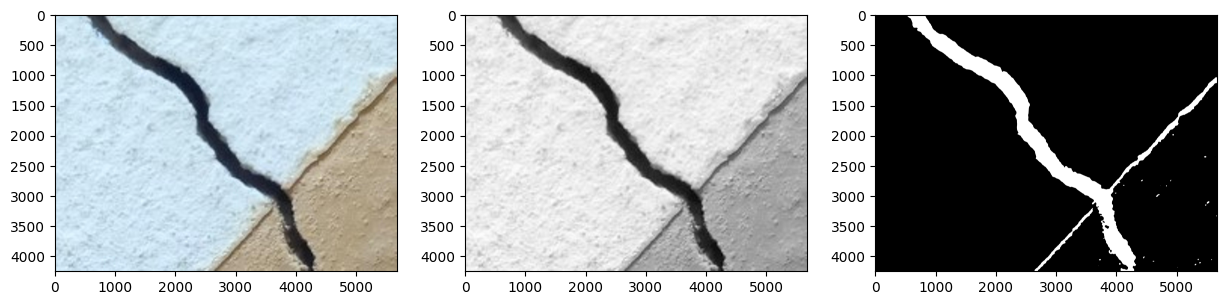

In [314]:
positive_img_num = 1
negative_img_num = 0
os.environ["NUMBA_NUM_THREADS"] = "4"

images = load_images('data/Positive', positive_img_num) + load_images('data/Negative', negative_img_num)

for i in range(len(images)):

    start_time = time.time()
    processed_images = process_image(images[i])
    end_time = time.time()

    print(f"image №{i+1}\n" + 
          f"elapsed time: {end_time - start_time}\n" + 
          f"actual value: {i<=positive_img_num}\n" + 
          f"predicted value: {predict_crack(processed_images[2])}")
    
    plot_images(processed_images)